Doing Clustering on 2000 audios files using k-means cluster and support vector machine (SVM)

Names clarification

after extracting new features from the original features.
The original features:

energy
pulse
tone
noise

The new features are 24 features, the first 6 extracted from energy, the second 6 features from pulse,.. and so on

dataSet_high[:,0:6] exctracted from energy

dataSet_high[:,6:12] exctracted from pulse

dataSet_high[:,12:18] exctracted from tone

dataSet_high[:,18:24] exctracted from noise

when I mention energy feature I mean the features extracted from energy ..etc.

prepare all the library needed for doing machine learning 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import matplotlib as mpl
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA, PCA
from sklearn import decomposition
import os
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix ,accuracy_score



hdf5_file = None


def read_data(file_name):
    data = pd.read_csv(file_name)
    return data
    

def open_hdf5_file(hdf5Files):
    global hdf5_file
    hdf5_file = h5py.File(str(hdf5Files) ,'r') 
    keys_list=list(hdf5_file.keys())
    return keys_list


def open_as_dataframe(DataframeData):
    global hdf5_file
    data_file =list(hdf5_file[str(DataframeData)])
    return data_file



['energy', 'noise', 'pulse', 'tone']


/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log


<Figure size 7200x7200 with 0 Axes>

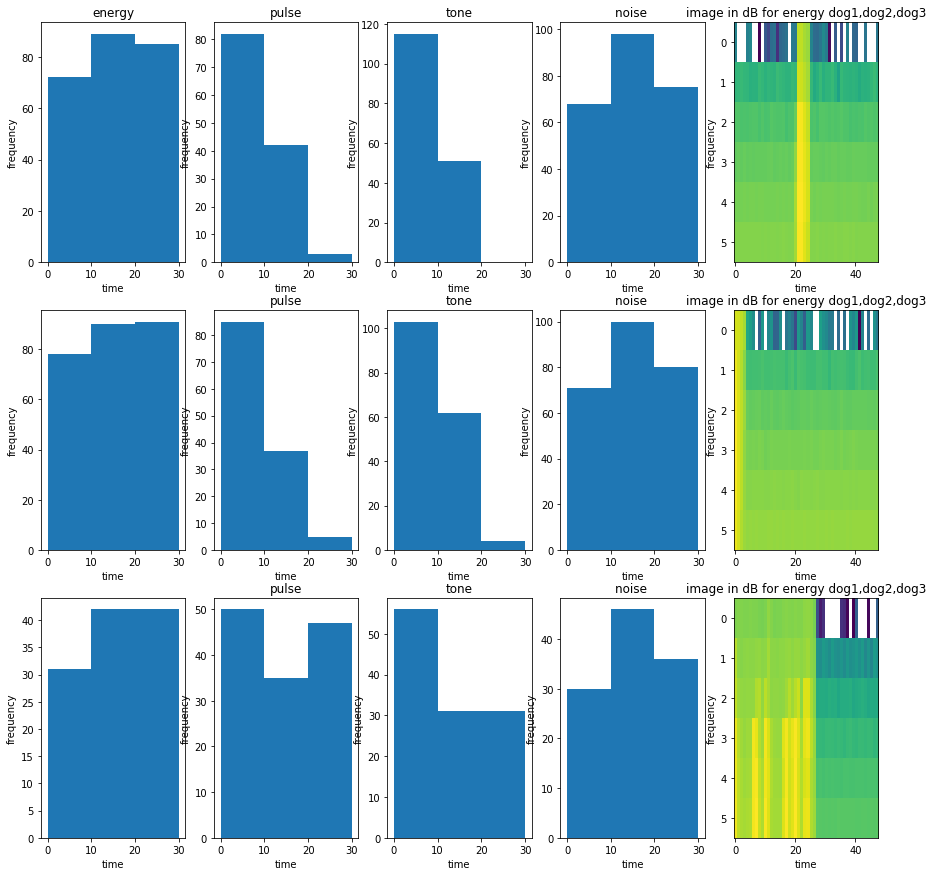

In [2]:
# Visualization of three dogs sounds 
f1 = h5py.File('1-100032-A-0.wav.1.hdf5' ,'r') # dog 1
ls=list(f1.keys())
print(ls)

f2 = h5py.File('1-110389-A-0.wav.1.hdf5' ,'r') # dog 2
ls=list(f2.keys())

f3 = h5py.File('5-9032-A-0.wav.1.hdf5' ,'r') # dog 3
ls=list(f3.keys())


df1=np.array(f1['energy']) #dog 1
df2=np.array(f2['energy']) #dog 2
df3=np.array(f3['energy']) #dog 3

sp1=np.array(f1['pulse']) #dog 1
sp2=np.array(f2['pulse']) #Dog2
sp3=np.array(f3['pulse']) #dog3

t1=np.array(f1['tone']) #dog 1
t2=np.array(f2['tone']) #Dog2
t3=np.array(f3['tone']) #dog3

n1=np.array(f1['noise']) #dog 1
n2=np.array(f2['noise']) #Dog2
n3=np.array(f3['noise']) #dog3


## histtogram for energy feature for sound dog1,dog2,dog3
fig= plt.figure(figsize=(100,100))
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(15,15))
# axes[0][0].set_title('energy')
axes[0][0].hist(df1.flatten(), bins=[0,10,20,30])
axes[1][0].hist(df2.flatten(), bins=[0,10,20,30])
axes[2][0].hist(df3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[0][0].set_title('energy')
    axes[i][0].set_xlabel('time')
    axes[i][0].set_ylabel('frequency')


## histtogram for pulse feature for sound dog1,dog2,dog3
# axes[0][1].set_title('pulse')
axes[0][1].hist(sp1.flatten(), bins=[0,10,20,30])
axes[1][1].hist(sp2.flatten(), bins=[0,10,20,30])
axes[2][1].hist(sp3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[i][1].set_title('pulse')
    axes[i][1].set_xlabel('time')
    axes[i][1].set_ylabel('frequency')
    
## histtogram for tone feature for sound dog1,dog2,dog3 
# axes[0][2].set_title('tone')
axes[0][2].hist(t1.flatten(), bins=[0,10,20,30])
axes[1][2].hist(t2.flatten(), bins=[0,10,20,30])
axes[2][2].hist(t3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[i][2].set_title('tone')
    axes[i][2].set_xlabel('time')
    axes[i][2].set_ylabel('frequency')

## histtogram for noise feature for sound dog1,dog2,dog3
#axes[0][3].set_title('noise ')
axes[0][3].hist(n1.flatten(), bins=[0,10,20,30])
axes[1][3].hist(n2.flatten(), bins=[0,10,20,30])
axes[2][3].hist(n3.flatten(), bins=[0,10,20,30])
for i in range(3):
    axes[i][3].set_title('noise ')
    axes[i][3].set_xlabel('time')
    axes[i][3].set_ylabel('frequency')

## image in dB energy feature for sound dog1,dog2,dog3
#axes[0][4].set_title('image in dB for energy dog1,dog2,dog3')
axes[0][4].imshow(np.log(df1),aspect='auto')
axes[1][4].imshow(np.log(df2),aspect='auto')
axes[2][4].imshow(np.log(df3),aspect='auto')
for i in range(3):
    axes[i][4].set_title('image in dB for energy dog1,dog2,dog3')
    axes[i][4].set_xlabel('time')
    axes[i][4].set_ylabel('frequency')

plt.show()

/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
/home/wkhalili/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarnin

<Figure size 7200x7200 with 0 Axes>

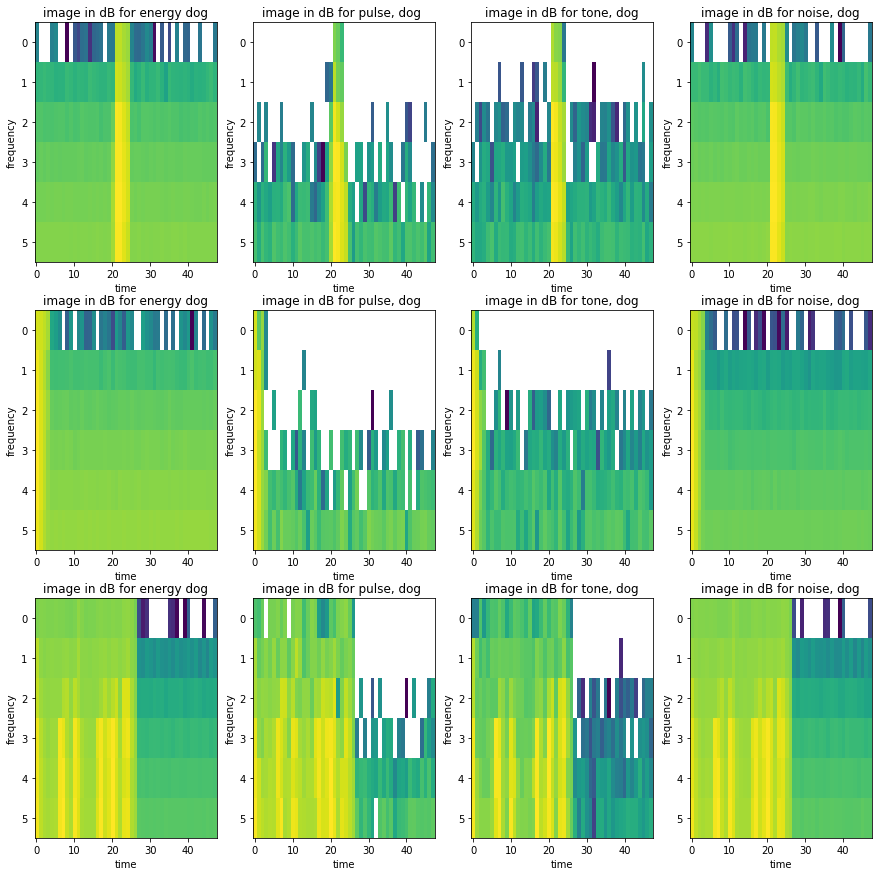

In [10]:
## image in dB for three sounds of three dogs
#just for visualization
fig= plt.figure(figsize=(100,100))
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(15,15))


## image in dB energy feature for the three sounds
#axes[0][0].set_title('image for energy of the three dogs')
axes[0][0].imshow(np.log(df1),aspect='auto')
axes[1][0].imshow(np.log(df2),aspect='auto')
axes[2][0].imshow(np.log(df3),aspect='auto')
for i in range(3):
    axes[i][0].set_title('image in dB for energy dog')
    axes[i][0].set_xlabel('time')
    axes[i][0].set_ylabel('frequency')

## image in dB pulse feature for the three sounds
#axes[0][1].set_title('image for pulse of the three dogs')
axes[0][1].imshow(np.log(sp1),aspect='auto')
axes[1][1].imshow(np.log(sp2),aspect='auto')
axes[2][1].imshow(np.log(sp3),aspect='auto')
for i in range(3):
    axes[i][1].set_title('image in dB for pulse, dog ')
    axes[i][1].set_xlabel('time')
    axes[i][1].set_ylabel('frequency')

## image in dB tone feature for the three sounds
#axes[0][2].set_title('image for tone of the three dogs')
axes[0][2].imshow(np.log(t1),aspect='auto')
axes[1][2].imshow(np.log(t2),aspect='auto')
axes[2][2].imshow(np.log(t3),aspect='auto')
for i in range(3):
    axes[i][2].set_title('image in dB for tone, dog')
    axes[i][2].set_xlabel('time')
    axes[i][2].set_ylabel('frequency')

## image in dB noise feature for the three sounds
#axes[0][3].set_title('image for noise of the three dogs')
axes[0][3].imshow(np.log(n1),aspect='auto')
axes[1][3].imshow(np.log(n2),aspect='auto')
axes[2][3].imshow(np.log(n3),aspect='auto')
for i in range(3):
    axes[i][3].set_title('image in dB for noise, dog')
    axes[i][3].set_xlabel('time')
    axes[i][3].set_ylabel('frequency')

plt.show()

 # From the visualization above it seems that the files are corrupted. but this files I downloaded them from the new processed files.

In [2]:
##  read the meta data 
metadata=read_data("esc50.csv")
print(metadata)

# The 2000 labels 
category=metadata['category']   ### 2000  labels 
#[B]

               filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]


In [3]:
## Number of classes 
Category=category.unique() 
print(Category)  ### there are 50 labels , basically we have 5 classes each class has 400 different sounds 



### the labels of 2000 files based on 50 labels
true_labels=metadata['target'] 
print(true_labels.shape)


###[1]

['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']
(2000,)


In [4]:
## datafilename using os.path
thisdir= os.getcwd()

datafilename=list()
for r, d, f in os.walk(thisdir):
    for file in f:
        if ".hdf5" in file:
            data=os.path.join( file)
            datafilename.append(data)

#print(datafilename)

In [6]:

# extract features from 2000 files 

energy_data=list()
noise_data=list()
tone_data=list()
pulse_data=list()
energy_data_high=list()
noise_data_high=list()
tone_data_high=list()
pulse_data_high=list()
meaned_energy=list()
std_energy_data=list()
meaned_noise=list()
std_noise_data=list()
meaned_pulse=list()
std_pulse_data=list()
meaned_tone=list()
std_tone_data=list()

std_energy_data1=list()
meaned_energy_data1=list()
std_noise_data1=list()
meaned_noise_data1=list()
std_pulse_data1=list()
meaned_pulse_data1=list()
std_tone_data1=list()
meaned_tone_data1=list()


### using percentile to get rid of time parameter, after sorting data in ascending way 
#[https://github.com/tdunning/t-digest/blob/master/docs/t-digest-paper/histo.pdf]

for data in datafilename:
    ls1=open_hdf5_file(data) #('energy','pulse','noise','tone')
    for index in ls1:
        if str(index)=='energy': 
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_energy_data=np.percentile(sortedarr, 95, axis=1) # percentage along row 
            meaned_energy_data=np.mean(percentile_energy_data,axis=None)
            standard_deviation_energy_data=np.std(percentile_energy_data,axis=None)
            meaned_energy.append(meaned_energy_data)
            std_energy_data.append(standard_deviation_energy_data)
            energy_data.append(percentile_energy_data)
            

        elif str(index)=='noise':
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_noise_data=np.percentile(sortedarr, 95, axis=1)
            meaned_noise_data=np.mean(percentile_noise_data,axis=None)
            standard_deviation_noise_data=np.std(percentile_noise_data,axis=None)
            meaned_noise.append(meaned_noise_data)
            std_noise_data.append(standard_deviation_noise_data)
            noise_data.append(percentile_noise_data)
           

        elif str(index)=='pulse':
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_pulse_data=np.percentile(sortedarr, 95, axis=1)
            meaned_pulse_data=np.mean(percentile_pulse_data,axis=None)
            standard_deviation_pulse_data=np.std(percentile_pulse_data,axis=None)
            meaned_pulse.append(meaned_pulse_data)
            std_pulse_data.append(standard_deviation_pulse_data)
            pulse_data.append(percentile_pulse_data)
            

        elif str(index)=='tone':
            opened_dataframe=open_as_dataframe(index)
            sortedarr=np.sort(opened_dataframe,axis=1)
            percentile_tone_data=np.percentile(sortedarr, 95, axis=1)
            meaned_tone_data=np.mean(percentile_energy_data,axis=None)
            standard_deviation_tone_data=np.std(percentile_tone_data,axis=None)
            meaned_tone.append(meaned_energy_data)
            std_tone_data.append(standard_deviation_tone_data)
            tone_data.append(percentile_tone_data)   
           
            
    energy_data_high=np.vstack(energy_data)
    noise_data_high=np.vstack(noise_data)
    pulse_data_high=np.vstack(pulse_data)
    tone_data_high=np.vstack(tone_data)
    std_tone_data1=np.vstack(std_tone_data)
    meaned_tone_data1=np.vstack(meaned_tone)
    std_pulse_data1=np.vstack(std_pulse_data)
    meaned_pulse_data1=np.vstack(meaned_pulse)
    std_energy_data1=np.vstack(std_energy_data)
    meaned_energy_data1=np.vstack(meaned_energy)
    std_noise_data1=np.vstack(std_noise_data)
    meaned_noise_data1=np.vstack(meaned_noise)


print("length of the energy data",energy_data_high.shape)#,np.size(energy_data,1))
#print("the first row of the energy data array",energy_data)

print("length of the noise data",noise_data_high.shape)#,np.size(noise_data,1)
#print("the first row of the noise data array",noise_data[0])

print("length of the tone data",tone_data_high.shape)#,np.size(tone_data,1)
#print("the first row of the tone data array",tone_data[0])

print("length of the pulse data",pulse_data_high.shape)#,np.size(pulse_data,1)
#print("the  pulse data array",pulse_data[0])
 

length of the energy data (2000, 6)
length of the noise data (2000, 6)
length of the tone data (2000, 6)
length of the pulse data (2000, 6)


In [8]:
### build the dataset matrix and stacked the 24 features that extracted
#from (energy,pulse,tone,noise) for percentile 95%

dataSet_high=np.hstack([energy_data_high,pulse_data_high,tone_data_high,noise_data_high])
print(dataSet_high.shape)

meaned_dataSet=np.hstack([meaned_energy_data1,meaned_pulse_data1,meaned_tone_data1,meaned_noise_data1])
std_dataSet=np.hstack([std_energy_data1,std_pulse_data1,std_tone_data1,std_noise_data1])
print(meaned_dataSet.shape)

(2000, 24)
(2000, 4)


In [35]:

#### visualize the data using pair plot  for dataset_high
#### another way to see  which feature are more representative 

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high, category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        'c7','c8','c9','c10','c11','c12',
                                        'c13','c14','c15','c16','c17','c18',
                                        'c19','c20','c21','c22','c23','c24',])

features['labels']= y_train

print(features)

              c1          c2          c3          c4          c5          c6  \
0      96.031535   93.982763   96.363331   99.279179  101.505183  104.814483   
1      92.200187   95.608600  101.842342  102.501961   99.168525   95.951326   
2      95.604182  100.146136  103.964451  101.439931   98.130906   91.406951   
3      86.164896   89.951950   85.936787   82.958893   84.025899   86.395946   
4     100.604255   99.582645  100.528089  102.928780  106.222527  109.758122   
...          ...         ...         ...         ...         ...         ...   
1495   57.651727   64.470531   80.987289   96.614545   94.951830  101.790343   
1496   78.920909   88.528815   94.984971   97.657754  101.352261  106.447198   
1497   91.401637   84.176178   80.202699   83.485815   78.539079   86.781591   
1498   78.163071  103.831055  100.552832   97.997905   95.564917   93.340993   
1499   92.131221   89.828647   91.088696   90.576005   83.741465   76.967741   

             c7         c8         c9  

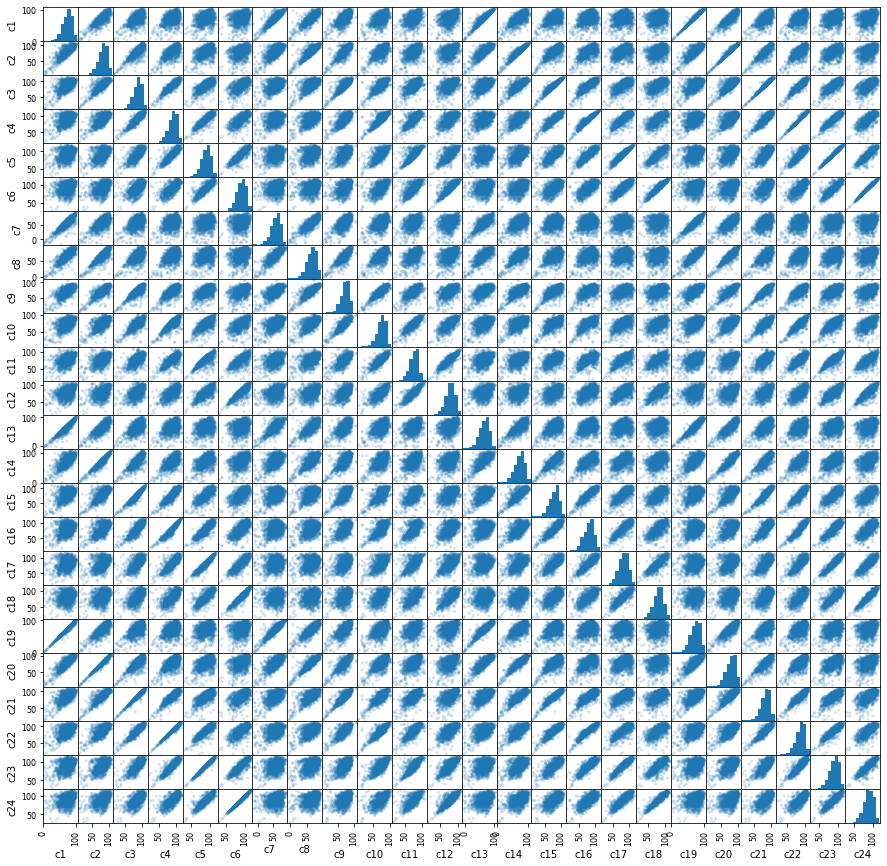

Figure 2
visualize the data using pair plot


In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2')
print('visualize the data using pair plot')

##[3]

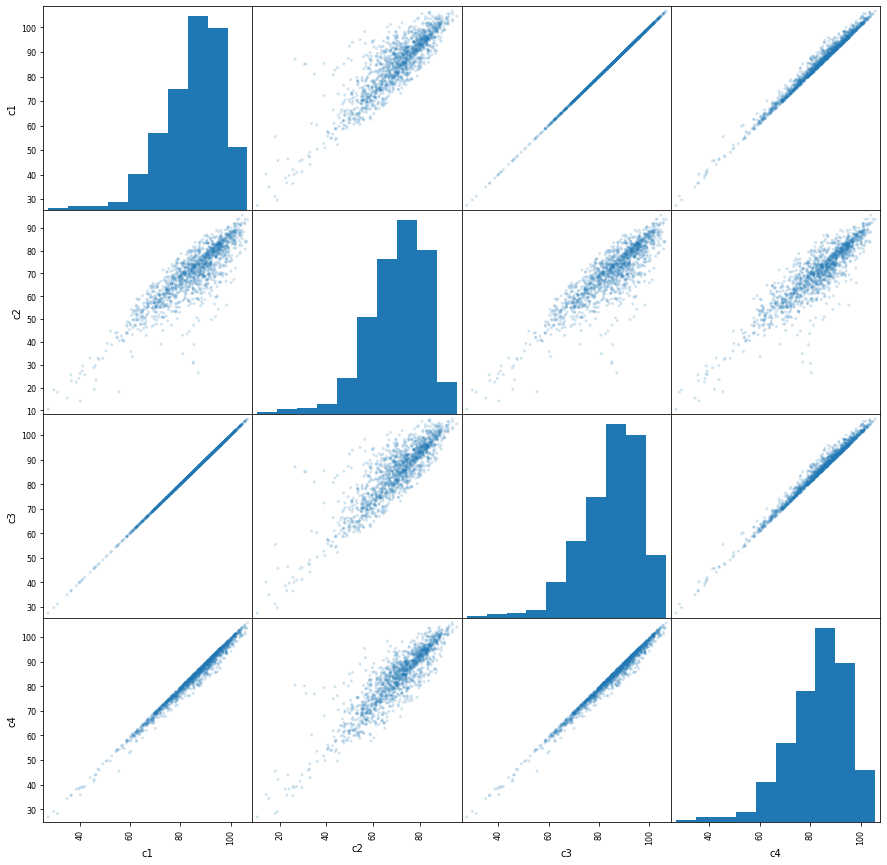

Figure 2b
visualize the data using pair plot


In [9]:

#### visualize the data using pair plot 
# meaned dataSet

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(meaned_dataSet, category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

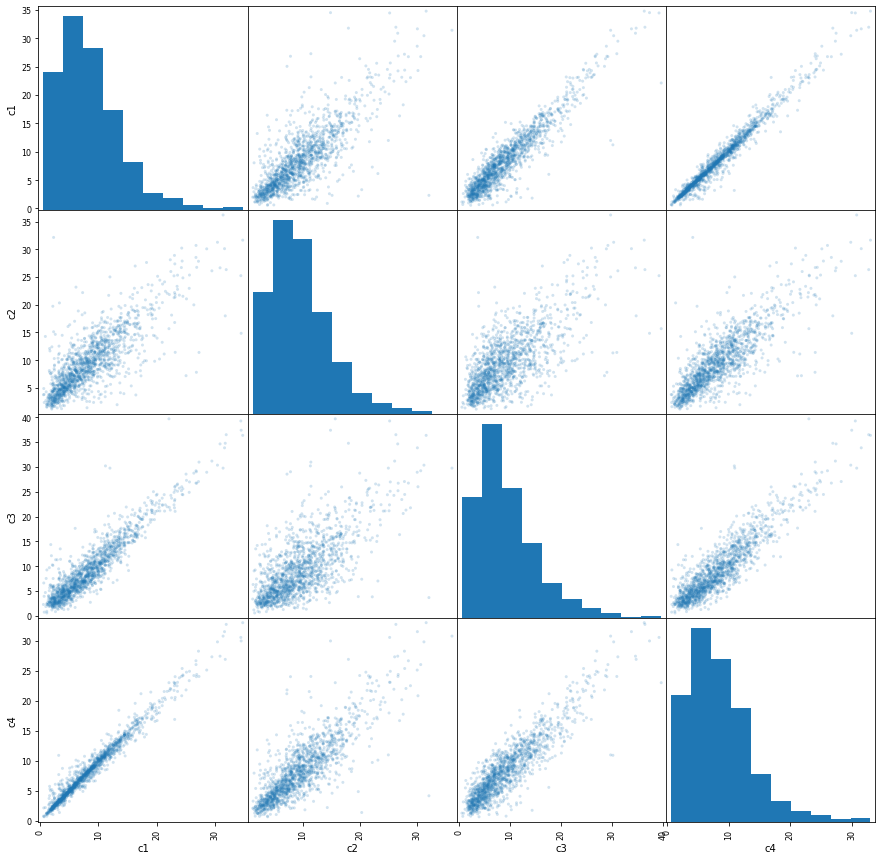

Figure 2b
visualize the data using pair plot


In [10]:

#### visualize the data using pair plot 
# std_dataSet

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(std_dataSet, category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

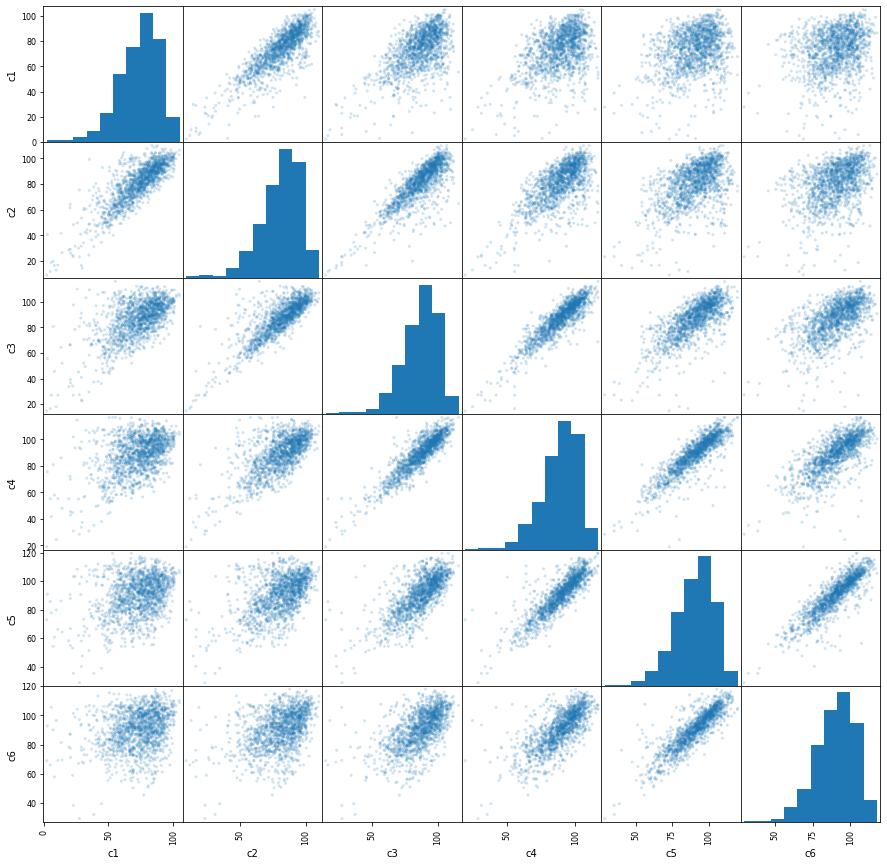

Figure 2b
visualize the data using pair plot


In [23]:

#### visualize the data using pair plot 
# energy

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,0:6], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

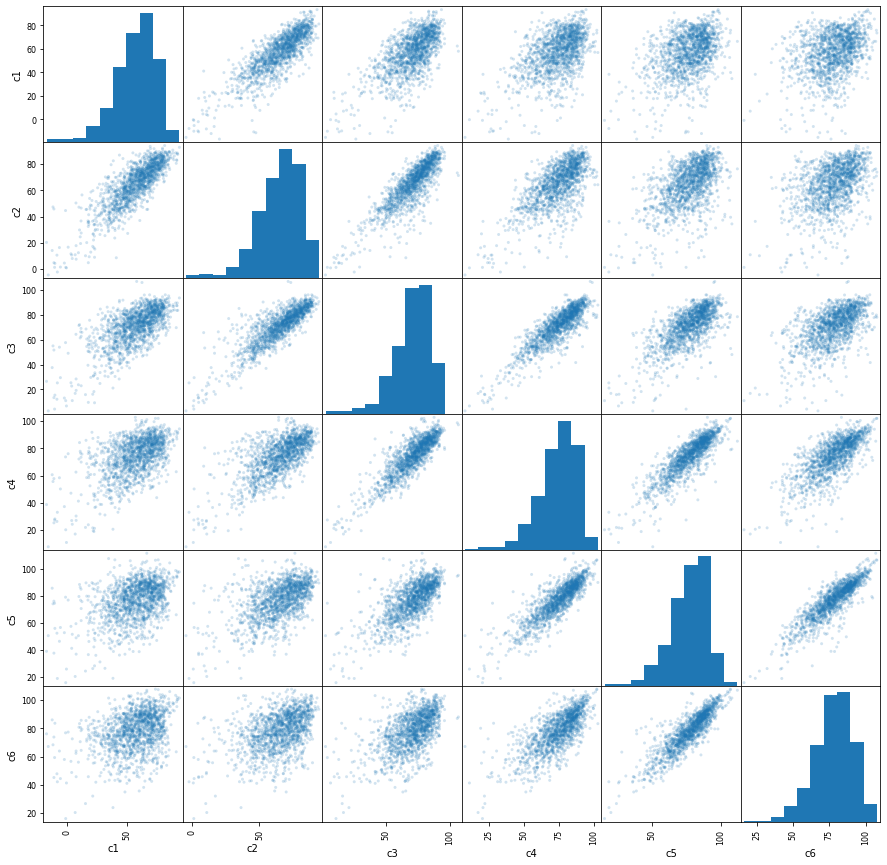

Figure 2b
visualize the data using pair plot


In [24]:

#### visualize the data using pair plot 
# pulse

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,6:12], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

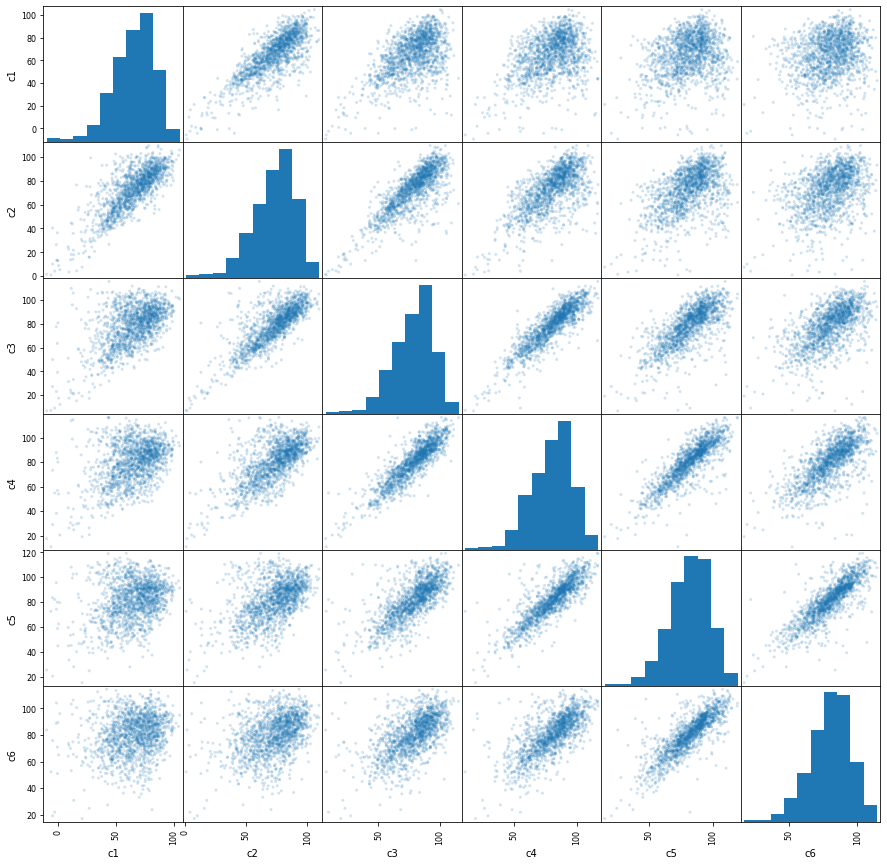

Figure 2b
visualize the data using pair plot


In [25]:

#### visualize the data using pair plot 
# tone

#prepare the data for visualization using pandas data frame
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,12:18], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]

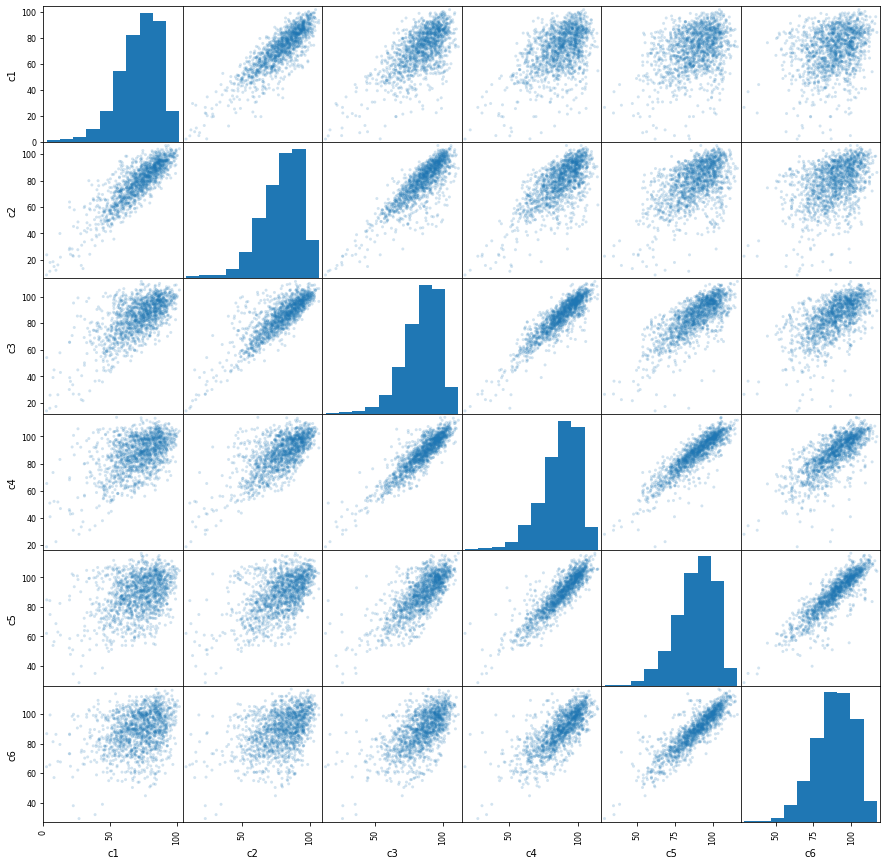

Figure 2b
visualize the data using pair plot


In [26]:

#### visualize the data using pair plot 
# noise

#prepare the data for visualization using pandas data frame 
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(dataSet_high[:,18:24], category, random_state=0)

features= pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6',
                                        ])

features['labels']= y_train

#print(features)
from pandas.plotting import scatter_matrix
scatter_matrix(features, alpha=0.2, figsize=(15, 15))
plt.show()

print('Figure 2b')
print('visualize the data using pair plot')

##[3]


# It can be noticed that the shape of the data  for some of the features is almost stretched towards diagonal,as I mentioned in (PTNE processing) that the shape of data has impact on the algorithm.I'm positive sure that this sub features is unsuitable for clustering